# Simple Lieanr Regression

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('datasets/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
dfc=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
dfc

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

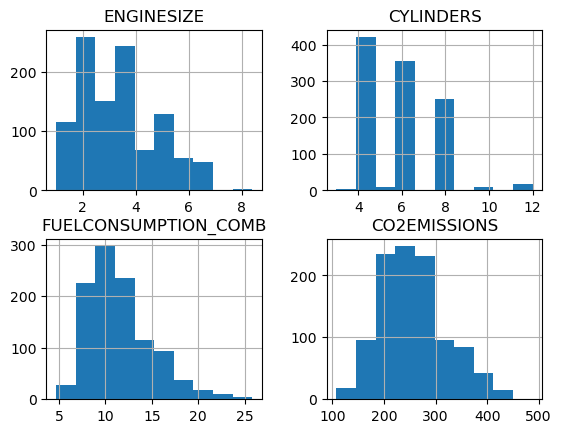

In [6]:
dfc.hist()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

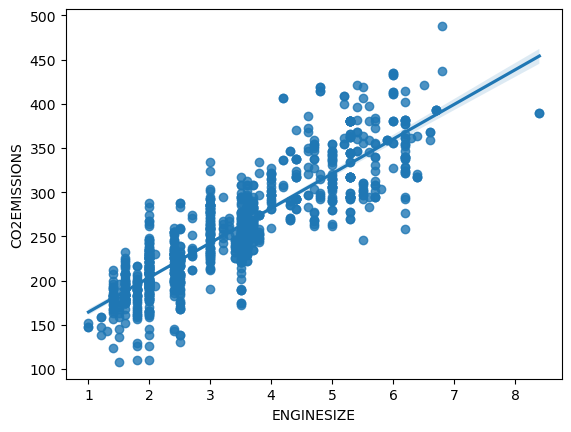

In [9]:
# plt.scatter(dfc['ENGINESIZE'],dfc['CO2EMISSIONS'],color='blue')
sns.regplot(dfc,x='ENGINESIZE',y='CO2EMISSIONS')

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

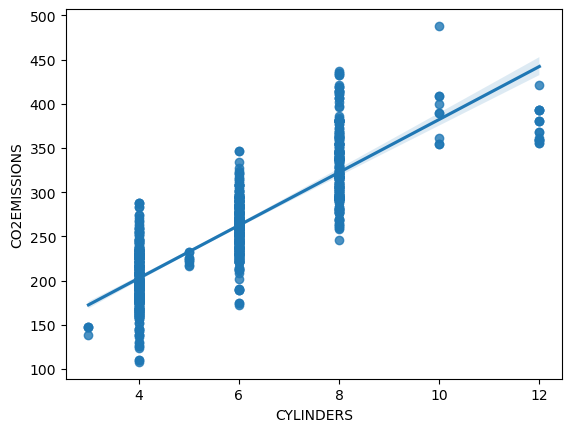

In [10]:
sns.regplot(dfc,x='CYLINDERS',y='CO2EMISSIONS')

<Axes: xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

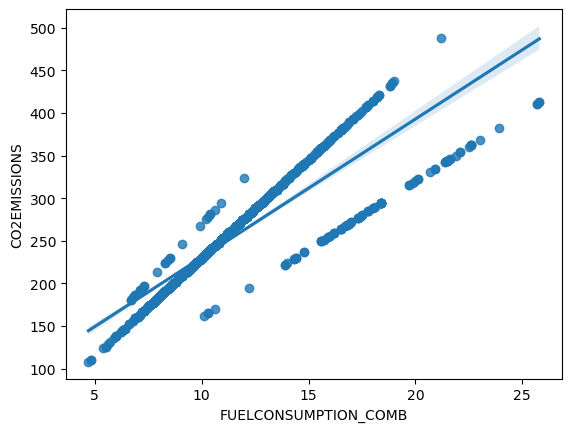

In [11]:
sns.regplot(dfc,x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS')

# creating test and train datasets

In [44]:
msk = np.random.rand(len(df)) < 0.8
train = dfc[msk]
test = dfc[~msk]
test.shape, train.shape

((218, 4), (849, 4))

# modelling

In [17]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
x=train[['ENGINESIZE']]
y=train['CO2EMISSIONS']

In [20]:
model.fit(x,y)

LinearRegression()

In [25]:
model.coef_,model.intercept_

(array([39.29293638]), 124.4591818743198)

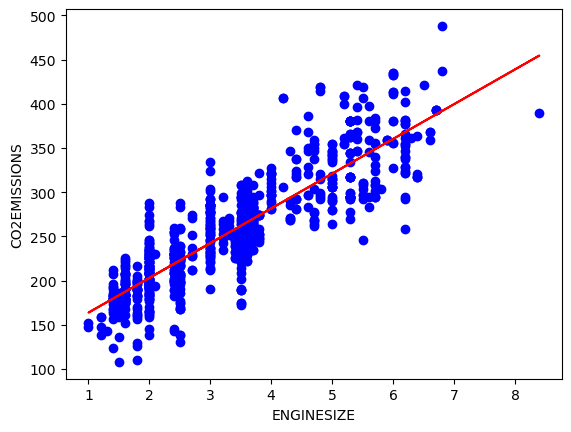

In [28]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color='blue')
plt.plot(train[['ENGINESIZE']],model.coef_[0]*train[['ENGINESIZE']]+model.intercept_,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

# Evaluation
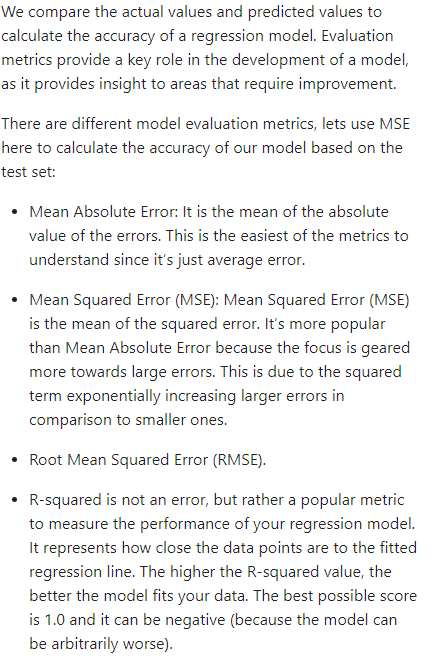

In [29]:
from sklearn.metrics import r2_score

In [45]:
test_x=test[['ENGINESIZE']]
test_y=test['CO2EMISSIONS']
test_y_predict=model.predict(test_x)
print(f'Mean absolute error: {np.mean(np.absolute(test_y_predict-test_y))}')
print(f'Residual sum of squares (MSE): {np.mean((test_y_predict-test_y)**2)}')
print(f'R2-score: {r2_score(test_y,test_y_predict)}')

Mean absolute error: 23.374477211259133
Residual sum of squares (MSE): 973.4265615894302
Mean absolute error: 0.7691781196203782


# Exercise

In [36]:
x=train[['FUELCONSUMPTION_COMB']]
y=train['CO2EMISSIONS']
model2=LinearRegression()
model2.fit(x,y)

LinearRegression()

In [38]:
model2.coef_,model2.intercept_

(array([16.36204948]), 66.73067770457831)

In [48]:
test_x=test[['FUELCONSUMPTION_COMB']]
test_y=test['CO2EMISSIONS']
test_y_predict=model2.predict(test_x)
print(f'Mean absolute error: {np.mean(np.absolute(test_y_predict-test_y))}')
print(f'Residual sum of squares (MSE): {np.mean((test_y_predict-test_y)**2)}')
print(f'R2 score: {r2_score(test_y,test_y_predict)}')

Mean absolute error: 19.75232319695313
Residual sum of squares (MSE): 774.6153038088294
R2 score: 0.8163208524903606
